<a href="https://colab.research.google.com/github/MohanZhu0623/Sentiment_Analysis/blob/main/Combined_TM(Full_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install contextualized-topic-models

In [ ]:
%%capture
!pip install pyldavis

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/vinid/data/master/dbpedia_sample_abstract_20k_unprep.txt

In [ ]:
!head -n 2 dbpedia_sample_abstract_20k_unprep.txt

The Mid-Peninsula Highway is a proposed freeway across the Niagara Peninsula in the Canadian province of Ontario. Although plans for a highway connecting Hamilton to Fort Erie south of the Niagara Escarpment have surfaced for decades,it was not until The Niagara Frontier International Gateway Study was published by the Ministry
Monte Zucker (died March 15, 2007) was an American photographer. He specialized in wedding photography, entering it as a profession in 1947. In the 1970s he operated a studio in Silver Spring, Maryland. Later he lived in Florida. He was Brides Magazine's Wedding Photographer of the Year for 1990 and


In [ ]:
import pandas as pd
df = pd.read_excel('/content/kickstarter_data_sampled_sentiment&WC.xlsx')
text_data = df['blurb'].tolist()

In [ ]:
!pip install --upgrade scipy gensim

  Using cached scipy-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
Using cached gensim-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.2.0
    Uninstalling gensim-4.2.0:
      Successfully uninstalled gensim-4.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contextualized-topic-models 2.5.0 requires gensim==4.2.0, but you have gensim 4.3.3 which is incompatible.


In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
from nltk.corpus import stopwords as stop_words

nltk.download('stopwords')

documents = [line.strip() for line in text_data]

stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

tp = TopicModelDataPreparation("all-mpnet-base-v2")
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
tp.vocab[:10]

array(['abandoned', 'ability', 'able', 'abstract', 'abuse', 'access',
       'accessible', 'accessories', 'accessory', 'achieve'], dtype=object)

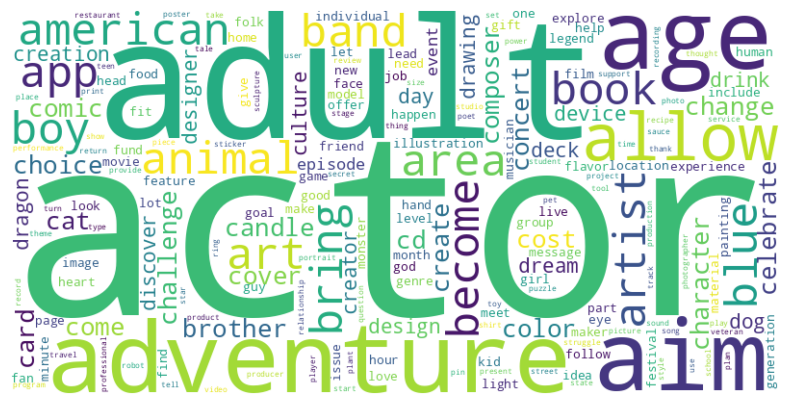

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ' '.join(tp.vocab)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=20, num_epochs=10)
ctm.fit(training_dataset)   # run the model

0it [00:00, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch: [10/10]	 Seen Samples: [199680/199740]	Train Loss: 63.819585115481644	Time: 0:00:07.074686: : 10it [01:11,  7.16s/it]
100%|██████████| 313/313 [00:04<00:00, 66.24it/s]


In [ ]:
# Get the top 10 words for each topic
topic_lists = ctm.get_topic_lists(10)

# Output the top 10 words for each topic line by line
for i, topic in enumerate(topic_lists):
    print(f'Topic {i + 1}: {", ".join(topic)}')

Topic 1: made, unique, hand, quality, coffee, high, home, using, like, creating
Topic 2: help, make, want, us, people, get, like, need, start, free
Topic 3: album, record, songs, first, length, full, debut, ep, studio, band
Topic 4: game, games, adventure, action, players, play, fantasy, battle, rpg, strategy
Topic 5: community, us, dance, free, new, artists, support, space, help, show
Topic 6: story, novel, journey, war, dark, web, fantasy, death, past, epic
Topic 7: book, world, children, stories, people, around, magazine, self, women, series
Topic 8: device, smart, easy, phone, system, wireless, power, control, app, devices
Topic 9: help, us, need, get, make, want, fund, money, new, first
Topic 10: art, create, project, artist, creating, design, photography, fine, using, want
Topic 11: film, short, feature, love, young, life, story, girl, man, comedy
Topic 12: comfort, quality, hand, wear, made, shoes, fit, affordable, handcrafted, designed
Topic 13: cards, enamel, pins, deck, inspi

In [ ]:
topic_lists = ctm.get_topic_lists(5)
print(topic_lists)

[['film', 'short', 'feature', 'comedy', 'documentary'], ['food', 'coffee', 'taste', 'fresh', 'delicious'], ['app', 'easy', 'platform', 'online', 'use'], ['art', 'project', 'create', 'community', 'artists'], ['book', 'children', 'stories', 'photography', 'photos'], ['new', 'music', 'show', 'video', 'live'], ['album', 'record', 'need', 'help', 'first'], ['game', 'adventure', 'action', 'series', 'fantasy'], ['help', 'us', 'album', 'need', 'get'], ['phone', 'power', 'time', 'way', 'social'], ['book', 'art', 'comic', 'edition', 'limited'], ['story', 'life', 'one', 'man', 'young'], ['food', 'want', 'community', 'home', 'start'], ['people', 'world', 'life', 'love', 'want'], ['inspired', 'cards', 'enamel', 'pins', 'pin'], ['help', 'us', 'need', 'make', 'get'], ['light', 'pro', 'led', 'listen', 'waterproof'], ['dance', 'performance', 'music', 'th', 'jazz'], ['made', 'unique', 'hand', 'handmade', 'quality'], ['album', 'music', 'songs', 'recording', 'record']]


In [ ]:
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

100%|██████████| 313/313 [00:11<00:00, 27.62it/s]


In [ ]:
import pyLDAvis as vis

lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

  0%|          | 0/313 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 313/313 [00:09<00:00, 34.57it/s]
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
